## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa prosta

Regresja liniowa prosta, to szczególny przypadek regresji liniowej, w którym zmienną objaśnaną przewidujemy za pomocą jednej zmiennej objaśniającej. Zadanie będzie polegało na wyznaczeniu funkcji regresji opisującej zależność zarobków od lat doświadczenia. 

Zbiór danych do tego zadania, to Salary.csv. Znajduje się w katalogu datasets.
W zbiorze danych znajduje się 35 obserwacji. Każdy wpis jest osobną obserwacją. W zbiorze znajdują się 3 kolumny: YearsExperience, Age i Salary. W pierwszym zadaniu należy wykorzystać YearsExperience i Salary, pomijając Age.

### Zadanie 1

Wczytaj dane z pliku Salary.csv, a następnie stwórz wykres przedstawiający obserwacje.

    pd.read_csv : Read a comma-separated values (csv) file into DataFrame.
    pd.DataFrame: Two-dimensional, size-mutable, potentially heterogeneous tabular data. Data structure also contains labeled axes (rows and columns).
    numpy.ndarray.reshape: Returns an array containing the same data with a new shape.
    pd.DataFrame.shape[0] : number of rows
    pd.DataFrame.shape[1] : number of columns

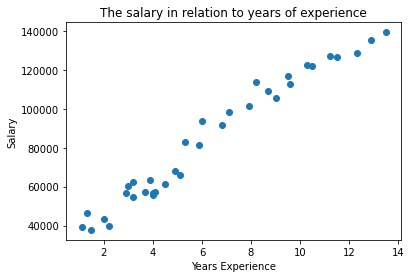

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/Salary.csv', sep=',')
x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)

plt.ylabel('Salary')
plt.xlabel('Years Experience')
plt.title('The salary in relation to years of experience')
plt.scatter(x,y)

### Zadanie 2

Implementacja algorytmu regresji liniowej prostej.

Żeby dobrze zrozumieć zapis matematyczny, który początkowo może sprawiać problemy, przejdziemy po kolei po elementach składowych algorytmu. Następnie złączymy elementy w całość.

Wzór na regresję liniową w naszym przypadku będzie wyglądał następująco:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 = \beta_{0} + \beta_{1}  YearsExperience
\end{equation}

Przypomnijmy, że zapis $x^{(i)}$ oznacza wektor dla $i$-tej obserwacji. W naszym przypadku ten wektor będzie zawierał tylko $1$ wartość dla cechy $YearsExperience$.


_Uwaga: W różnych źródłach algorytm regresji liniowej ma różne zapisy. Czasem podawane są wzory w postaci z sumą, czasem w postaci macierzowej. Jest to spowodowane tym, że algorytm można zaimplementować na te dwa sposoby. Łatwiejszym i bardziej intuicyjnym podejściem jest podejście z sumą, która bezpośrednio sugeruje wykokrzystanie pętli w celu iteracji po obserwacjach/cechach. Implementacja z wykorzystaniem macierzy jest zwykle krótksza i "bardziej elegancka", ale również bardziej wydajna. Aby dobrze zrozumieć działanie algorytmu, najlepiej jest zaimplementować obie wersje i porównać je ze sobą._


#### 2.1 Inicjalizacja współczynników $\beta$ regresji

Pierwszym krokiem jest inicjalizacja współczynników regresji. W przypadku regresji liniowej prostej mamy dwa współczynniki $\beta_{0}$ i $\beta_{1}$. Stwórz dwie zmienne będące współczynnikami regresji liniowej prostej i zainicjalizuj je losowymi wartościami z przedziału $(0,1)$.

Dodatkowo stwórz zmienną *alpha*, która przyjmie wartość od $(0,1)$. Możesz ustawić ją ręcznie i sprawdzać jak różne wartości mają wpływ na regresję. 

In [3]:
import random

def get_random():
    rand = random.uniform(0,1)
    if rand == 0:
        rand = random.uniform(0,1)
    else:
        return rand

#### 2.2 Obliczenie predykcji

Kolejnym krokiem jest obliczenie wartości funkcji regresji dla wszystkich obserwacji w zbiorze danych. Jest to po prostu wstawienie kolejnych wartości pod wzrór regresji.

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1
\end{equation}

Można zrobić to z wykorzystaniem operacji na macierzach (wektorach), albo z wykorzystaniem klasycznej iteracji. 

In [4]:
def prediction_calculate(beta_0, beta_1, x):
    return beta_0 + beta_1*x

#### 2.3 Obliczenie błędu

Obliczenie wartości błędu regresji nie jest konieczne do aktualizacji wag, jednak jest to bardzo cenna informacja czy nasz algorytm działa poprawnie. Wartość błędu nie może rosnąć w kolejnych epokach.

Błąd należy obliczyć zgodnie ze wzorem:

\begin{equation}
    SSR = \frac{1}{2m} \sum_{i=1}^{m}(f(x^{(i)}) - y^{(i)})^2
\end{equation}

In [5]:
def ssr_calculate(actual, predicted):
    sum = 0.0
    for i in range(len(actual)):
        sum += predicted[i] - actual[i]
    return sum**2 / 2*float(len(actual))

#### 2.4 Obliczenie gradientu 

Żeby obliczyć gradient, należy obliczyć pochodne cząstkowe względem parametrów $\beta_{0}$ i $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{0}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})
\end{equation}

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{1}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Tutaj ponownie jak wcześniej można wykorzystać operacje na macierzach, lub iteracyjnie obliczyć sumę.

In [6]:
def d_beta_0_ssr_calculate(actual, predicted):
    sum = 0.0
    for i in range(len(actual)):
        sum += predicted[i] - actual[i]
    return sum / float(len(actual))

In [7]:
def d_beta_1_ssr_calculate(actual, predicted, x):
    sum = 0.0
    for i in range(len(actual)):
        sum += (predicted[i] - actual[i])*x[i]
    return sum / float(len(actual))

####  2.5 Aktualizacja współczynników regresji (wag)

Po obliczeniu pochodnych cząstkowych należy obliczyć nowe wartości dla współczynników regresji.


\begin{equation}
    \beta_{0} = \beta_{0} - \alpha \frac{\partial SSR}{\partial \beta_{0}} 
\end{equation}

\begin{equation}
    \beta_{1} = \beta_{1} - \alpha \frac{\partial SSR}{\partial \beta_{1}} 
\end{equation}

In [8]:
def parameter_update(beta, alpha, d_beta_SSR):
    return beta - alpha*d_beta_SSR

#### 2.6 Finalna wersja algorytmu

Powyższe działania, to wszystkie elementy potrzebne do stworzenia algorytmu regresji liniowej prostej. Jeden cykl takich operacji nazywany jest **epoką**. Idea obliczania współczynników regresji z wykorzystaniem gradientu polega na iteracyjnym aktualizowaniu współczynników do momentu, aż błąd przestanie znacznie się zmieniać. Można również ustawić jakaś stałą ilość epok. W każdej epoce wykorzystuje się ponownie ten sam zestaw danych.

Skoro wiadomo już jakie pojedyncze etapy należy wykonać, żeby obliczyć regresję liniową prostą, przyszedł czas na zebranie wszystkiego w jednym miejscu.

Proszę zaimplementować funkcję `learn_and_fit(x, y)`, która dla danych wejściowych będzie zwracać współczynniki regresji w każdej z epok. Dodatkowo proszę zwracać również błąd regresji w każdej epoce. Funkcja może być zaimplementowana w dowolny sposób. Może bezpośrednio zawierać wszystkie instrukcje, może korzystać z innych funkcji pomocniczych albo może korzystać z klasy reprezentującą regresję liniową prostą. 

Na końcu notebooka znajduje się test jednostkowy, który musi przechodzić przy prawidłowej implementacji algorytmu.

In [9]:
'''
input:
x - wartości zmiennej objaśniającej YearsExperience dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
b1: [] - lista z współczynnikami beta_1 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
def algorithm(x,y,beta_0,beta_1,alpha):
    fx = prediction_calculate(beta_0, beta_1, x)
    SSR = ssr_calculate(y, fx)
    d_beta_0_SSR = d_beta_0_ssr_calculate(y,fx)
    d_beta_1_SSR = d_beta_1_ssr_calculate(y,fx,x)
    new_beta_0 = parameter_update(beta_0, alpha, d_beta_0_SSR)
    new_beta_1 = parameter_update(beta_1, alpha, d_beta_1_SSR)
    return SSR, new_beta_0, new_beta_1
    


def learn_and_fit(x, y):
    epochs = 100
    b0 = []
    b1 = []
    error = []
    beta_0 = get_random()
    beta_1 = get_random()
    alpha = get_random()
    b0.append(beta_0)
    b1.append(beta_1)
    for epoch in range(1,epochs):
        er, beta_0, beta_1 = algorithm(x,y,beta_0,beta_1,alpha)
        error.append(er)
        b0.append(beta_0)
        b1.append(beta_1)
    return b0, b1, error

In [10]:
b0_, b1_, error_ = learn_and_fit(x,y)

### Zadanie 3

Do wykresu stworzonego w zadaniu 1 dodaj prostą regresji. Pokaż w formie animacji, jak zmieniała się funkcja regresji na przestrzeni epok.

[0.6327711183546635, array([28467.80937134]), array([-418033.10135825]), array([7245376.11474512]), array([-1.23622992e+08]), array([2.11182601e+09]), array([-3.60727989e+10]), array([6.16175014e+11]), array([-1.05251467e+13]), array([1.79784499e+14]), array([-3.07097533e+15]), array([5.24566332e+16]), array([-8.96034017e+17]), array([1.53055374e+19]), array([-2.6144038e+20]), array([4.46577411e+21]), array([-7.62817831e+22]), array([1.30300152e+24]), array([-2.2257122e+25]), array([3.80183348e+26]), array([-6.49407313e+27]), array([1.1092802e+29]), array([-1.89480859e+30]), array([3.23660298e+31]), array([-5.52857893e+32]), array([9.44360033e+33]), array([-1.61310146e+35]), array([2.75540707e+36]), array([-4.70662777e+37]), array([8.03959067e+38]), array([-1.37327661e+40]), array([2.34575206e+41]), array([-4.00687867e+42]), array([6.84431953e+43]), array([-1.16910727e+45]), array([1.99700175e+46]), array([-3.41116346e+47]), array([5.82675309e+48]), array([-9.95292427e+49]), array([1.7

Text(0.5, 1.0, 'The salary in relation to years of experience')

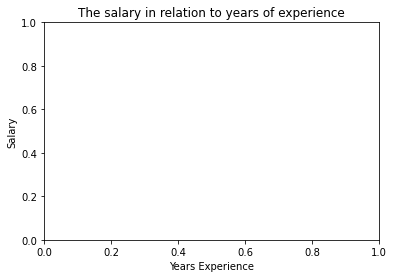

In [11]:
from numpy import *
import math
import matplotlib.pyplot as plt

simple_regression = []
for i in x:
    simple_regression.append(b1_[-2]*i+b0_[-2])

print(b0_)
print(b1_)
print(simple_regression)
    
    
t = linspace(0, 14)

plt.ylabel('Salary')
plt.xlabel('Years Experience')
plt.title('The salary in relation to years of experience')
#plt.plot(t,simple_regression, 'r')
#plt.scatter(t,y,'b')
#plt.show()

In [12]:
%matplotlib nbagg

### Testy jednostkowe

In [13]:
import unittest
import pandas as pd

class SimpleLinearRegressionTest(unittest.TestCase):
    
    def test_learn_and_fit(self):
        df = pd.read_csv('datasets/Salary.csv', sep=',')
        x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
        y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
        
        b0, b1, error = learn_and_fit(x, y)
        
        self.assertTrue(len(b0) > 1)
        self.assertTrue(len(b1) > 1)
        self.assertTrue(len(b0) == len(b1))
        self.assertTrue(all(i >= j for i, j in zip(error, error[1:]))) #Sprawdzenie, czy błędy nie rosną
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_learn_and_fit (__main__.SimpleLinearRegressionTest) ... C:\Users\LENOVO\AppData\Local\Temp/ipykernel_12880/2226334833.py:5: RuntimeWarning: overflow encountered in square
  return sum**2 / 2*float(len(actual))
ok

----------------------------------------------------------------------
Ran 1 test in 0.052s

OK
